<a href="https://colab.research.google.com/github/kwansawanth/expAI/blob/main/shap_grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import shutil

In [2]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dt_train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_train_Predict.csv')
dt_train

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Fold,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V1.jpg,2,0,Female,7.107492,7.0,0.000003,Female,0.0
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV1.jpg,4,0,Female,7.020138,7.0,0.000025,Female,0.0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V2.jpg,10,0,Female,6.975561,7.0,0.000808,Female,0.0
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV2.jpg,9,0,Female,6.938187,7.0,0.000107,Female,0.0
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V3.jpg,10,0,Female,6.916692,7.0,0.000014,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,4184,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J375.jpg,3,1,Male,25.299234,25.0,0.999988,Male,1.0
4185,4185,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J437.jpg,5,1,Male,24.729193,25.0,0.999987,Male,1.0
4186,4186,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J480.jpg,5,1,Male,24.564425,25.0,1.000000,Male,1.0
4187,4187,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J491.jpg,6,1,Male,24.113144,24.0,1.000000,Male,1.0


In [4]:
df = dt_train.drop(dt_train.columns[0], axis=1)
df

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Fold,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V1.jpg,2,0,Female,7.107492,7.0,0.000003,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV1.jpg,4,0,Female,7.020138,7.0,0.000025,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V2.jpg,10,0,Female,6.975561,7.0,0.000808,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV2.jpg,9,0,Female,6.938187,7.0,0.000107,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V3.jpg,10,0,Female,6.916692,7.0,0.000014,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J375.jpg,3,1,Male,25.299234,25.0,0.999988,Male,1.0
4185,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J437.jpg,5,1,Male,24.729193,25.0,0.999987,Male,1.0
4186,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J480.jpg,5,1,Male,24.564425,25.0,1.000000,Male,1.0
4187,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J491.jpg,6,1,Male,24.113144,24.0,1.000000,Male,1.0


#train

In [5]:
# นับรูป
# Get unique age values
unique_ages = dt_train['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = dt_train[(dt_train['Age(year)'] == age) & (dt_train['Gender'] == 'M')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = dt_train['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = dt_train[(dt_train['Age(year)'] == age) & (dt_train['Gender'] == 'F')].shape
    print(f"Age {age}: {shape}")

Age 7: (111, 15)
Age 8: (116, 15)
Age 9: (122, 15)
Age 10: (114, 15)
Age 11: (114, 15)
Age 12: (119, 15)
Age 13: (106, 15)
Age 14: (110, 15)
Age 15: (110, 15)
Age 16: (112, 15)
Age 17: (107, 15)
Age 18: (104, 15)
Age 19: (107, 15)
Age 20: (105, 15)
Age 21: (107, 15)
Age 22: (97, 15)
Age 23: (108, 15)
Age 24: (104, 15)
Age 25: (96, 15)
Age 7: (114, 15)
Age 8: (116, 15)
Age 9: (120, 15)
Age 10: (116, 15)
Age 11: (117, 15)
Age 12: (117, 15)
Age 13: (108, 15)
Age 14: (113, 15)
Age 15: (117, 15)
Age 16: (118, 15)
Age 17: (112, 15)
Age 18: (128, 15)
Age 19: (115, 15)
Age 20: (99, 15)
Age 21: (100, 15)
Age 22: (105, 15)
Age 23: (101, 15)
Age 24: (91, 15)
Age 25: (113, 15)


In [6]:
# เลือกรูปจาก train มาทำ bg data
import pandas as pd
import random

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Age(year)': dt_train['Age(year)'],
    'Gender': dt_train['Gender'],
    'Folder_type': dt_train['Folder_type'],
    'Folder_name': dt_train['Folder_name'],
    'Path_Name': dt_train['Path_Name'],
    'Filename': dt_train['Filename'],
}

df = pd.DataFrame(data)

# Calculate the desired number of rows per unique age
desired_per_age = 2660 // (25 - 7 + 1)

# Initialize a list to store selected rows
selected_rows = []

# Iterate through unique age values
for age in range(7, 26):
    # Get all rows with the current age
    age_rows = df[df['Age(year)'] == age]

    # Randomly shuffle the rows for this age
    age_rows = age_rows.sample(frac=1, random_state=42)

    # Determine the number of rows to select for each gender
    rows_per_gender = desired_per_age // 2

    # Select rows for both "Male" and "Female" genders
    selected_male_rows = age_rows[age_rows['Gender'] == 'M'].head(rows_per_gender)
    selected_female_rows = age_rows[age_rows['Gender'] == 'F'].head(rows_per_gender)

    # Append the selected rows to the list
    selected_rows.extend([selected_male_rows, selected_female_rows])

# Concatenate the selected rows for each age into a final DataFrame
selected_dft = pd.concat(selected_rows)

# Now, selected_df contains 950 rows with an approximately even distribution of ages from 7 to 25
# and an equal number of "Male" and "Female" samples for each age.


In [7]:
selected_dft

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
184,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV116.jpg
120,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV13.jpg
207,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV244.jpg
148,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV50.jpg
214,7,M,Normal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV28.jpg
...,...,...,...,...,...,...
4050,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J245.jpg
4044,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J218.jpg
4024,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J148.jpg
4020,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J144.jpg


In [8]:
# Get unique age values
unique_ages = selected_dft['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = selected_dft[(selected_dft['Age(year)'] == age) & (selected_dft['Gender'] == 'M')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = selected_dft['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = selected_dft[(selected_dft['Age(year)'] == age) & (selected_dft['Gender'] == 'F')].shape
    print(f"Age {age}: {shape}")

Age 7: (70, 6)
Age 8: (70, 6)
Age 9: (70, 6)
Age 10: (70, 6)
Age 11: (70, 6)
Age 12: (70, 6)
Age 13: (70, 6)
Age 14: (70, 6)
Age 15: (70, 6)
Age 16: (70, 6)
Age 17: (70, 6)
Age 18: (70, 6)
Age 19: (70, 6)
Age 20: (70, 6)
Age 21: (70, 6)
Age 22: (70, 6)
Age 23: (70, 6)
Age 24: (70, 6)
Age 25: (70, 6)
Age 7: (70, 6)
Age 8: (70, 6)
Age 9: (70, 6)
Age 10: (70, 6)
Age 11: (70, 6)
Age 12: (70, 6)
Age 13: (70, 6)
Age 14: (70, 6)
Age 15: (70, 6)
Age 16: (70, 6)
Age 17: (70, 6)
Age 18: (70, 6)
Age 19: (70, 6)
Age 20: (70, 6)
Age 21: (70, 6)
Age 22: (70, 6)
Age 23: (70, 6)
Age 24: (70, 6)
Age 25: (70, 6)


In [9]:
df_test_gender = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_test_Predict.csv')
df_test_gender = df_test_gender.iloc[:,1:]
print(df_test_gender.shape)
df_test_gender

(943, 13)


,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,0,Female,21.118502,21.0,1.193671e-01,Female,0.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0


In [10]:
# เลือกเฉพาะ row ที่ทายถูก
c = df_test_gender[((df_test_gender['Gender_predict_str'] == 'Female') & (df_test_gender['Gender'] == 'F')) | ((df_test_gender['Gender_predict_str'] == 'Male') & (df_test_gender['Gender'] == 'M'))]
c

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,0,Female,21.118502,21.0,1.193671e-01,Female,0.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0


In [11]:
def process_input(dt_train):
    # Initialize an empty list to store background data
    background_data = []

    # Ensure 'Path_Name' column exists in the DataFrame
    if 'Path_Name' not in dt_train.columns:
        raise ValueError("The 'Path_Name' column does not exist in the DataFrame.")

    # Loop to preprocess and create the background data
    for i in range(len(dt_train)):
        print(f"Processing image {i+1}/{len(dt_train)}")
        # Get the image path from the DataFrame
        image_path = dt_train['Path_Name'].iloc[i]  # Use .iloc to access rows by integer index
        # Load and preprocess the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust target_size
        preprocessed_image = img_to_array(image) / 255.0  # Normalize pixel values

        # Add the preprocessed image to the background_data list
        background_data.append(preprocessed_image)

    return background_data

In [12]:
import pandas as pd
import numpy as np
import torch
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [13]:
sdf_train = selected_dft.sort_values(by='Age(year)', kind='mergesort')
sdf_train

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
184,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV116.jpg
120,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV13.jpg
207,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV244.jpg
148,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV50.jpg
214,7,M,Normal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV28.jpg
...,...,...,...,...,...,...
4050,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J245.jpg
4044,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J218.jpg
4024,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J148.jpg
4020,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J144.jpg


In [14]:
background_train = process_input(sdf_train)

Processing image 1/2660
Processing image 2/2660
Processing image 3/2660
Processing image 4/2660
Processing image 5/2660
Processing image 6/2660
Processing image 7/2660
Processing image 8/2660
Processing image 9/2660
Processing image 10/2660
Processing image 11/2660
Processing image 12/2660
Processing image 13/2660
Processing image 14/2660
Processing image 15/2660
Processing image 16/2660
Processing image 17/2660
Processing image 18/2660
Processing image 19/2660
Processing image 20/2660
Processing image 21/2660
Processing image 22/2660
Processing image 23/2660
Processing image 24/2660
Processing image 25/2660
Processing image 26/2660
Processing image 27/2660
Processing image 28/2660
Processing image 29/2660
Processing image 30/2660
Processing image 31/2660
Processing image 32/2660
Processing image 33/2660
Processing image 34/2660
Processing image 35/2660
Processing image 36/2660
Processing image 37/2660
Processing image 38/2660
Processing image 39/2660
Processing image 40/2660
Processin

#test

In [15]:
# เลือกเฉพาะ row ที่ทายถูก
c = df_test_gender[((df_test_gender['Gender_predict_str'] == 'Female') & (df_test_gender['Gender'] == 'F')) | ((df_test_gender['Gender_predict_str'] == 'Male') & (df_test_gender['Gender'] == 'M'))]
c

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,0,Female,21.118502,21.0,1.193671e-01,Female,0.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0


In [16]:
# ทำค่า Prob
c['prob'] = c.apply(lambda row: 1 - row['Gender_predict'] if row['Gender'] == 'F' else row['Gender_predict'], axis=1)
#Select rows where 'prob' is greater than 0.9
d = c[c['prob'] > 0.90]

# Display the selected rows
d

<ipython-input-16-3c38c93a3af5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['prob'] = c.apply(lambda row: 1 - row['Gender_predict'] if row['Gender'] == 'F' else row['Gender_predict'], axis=1)


,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J86.jpg,0,Female,19.068132,19.0,9.307945e-06,Female,0.0,0.999991
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0,0.999982
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0,1.000000


In [17]:
selected_test = d
selected_test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J86.jpg,0,Female,19.068132,19.0,9.307945e-06,Female,0.0,0.999991
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0,0.999982
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0,1.000000


In [18]:
sdf_test = selected_test.sort_values(by='Age(year)', kind='mergesort')
sdf_test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J86.jpg,0,Female,19.068132,19.0,9.307945e-06,Female,0.0,0.999991
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0,0.999982
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0,1.000000


In [19]:
background_test = process_input(sdf_test)

Processing image 1/753
Processing image 2/753
Processing image 3/753
Processing image 4/753
Processing image 5/753
Processing image 6/753
Processing image 7/753
Processing image 8/753
Processing image 9/753
Processing image 10/753
Processing image 11/753
Processing image 12/753
Processing image 13/753
Processing image 14/753
Processing image 15/753
Processing image 16/753
Processing image 17/753
Processing image 18/753
Processing image 19/753
Processing image 20/753
Processing image 21/753
Processing image 22/753
Processing image 23/753
Processing image 24/753
Processing image 25/753
Processing image 26/753
Processing image 27/753
Processing image 28/753
Processing image 29/753
Processing image 30/753
Processing image 31/753
Processing image 32/753
Processing image 33/753
Processing image 34/753
Processing image 35/753
Processing image 36/753
Processing image 37/753
Processing image 38/753
Processing image 39/753
Processing image 40/753
Processing image 41/753
Processing image 42/753
P

#bg to array

In [20]:
background_train_array = np.array(background_train)
background_test_array = np.array(background_test)

#load Model

In [21]:
import os
import numpy as np
import pandas as pd
#import efficientnet.tfkeras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

In [22]:
batch_size = 16
width = 224
height = 224
epochs = 250 # รอบในการเทรน
dropout_rate = 0.2
input_shape = (height, width, 3)

In [23]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 21.81 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


In [24]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})


In [25]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 swish (Swish)               (None, 112, 112, 32)         0         ['batch_normalization[0][0

In [26]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


#shap

In [27]:
!pip install shap==0.44.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.6 MB/s eta 0:00:00


In [28]:
import shap

##model layer

In [29]:
model.output_names

['prediction_layer', 'prediction_layer2']

In [30]:
model.output_names[0] # age estimation

'prediction_layer'

In [31]:
model.output_names[1] # gender prediction

'prediction_layer2'

In [32]:
import shap
import tensorflow as tf

# Create separate models for each output you want to explain
#AGE
model_layer1 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer').output)
#Gender
model_layer2 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer2').output)
# Define your explainer for the first output layer (prediction_layer)
#AGE
explainer_layer1 = shap.GradientExplainer(model_layer1, background_train_array)
# Define your explainer for the second output layer (prediction_layer2)
#Gender
explainer_layer2 = shap.GradientExplainer(model_layer2, background_train_array)

##shap value plot image

###E_280_23Y_F

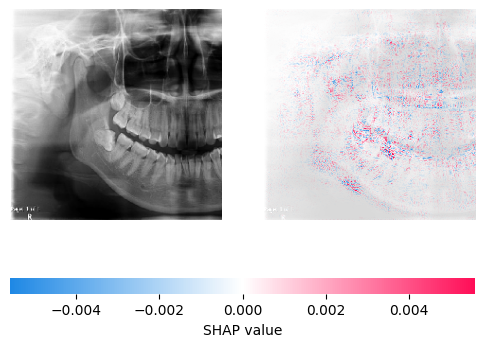

In [75]:
shap_values_E280_23Y_F = explainer_layer2.shap_values(background_test_array[[622]])
%matplotlib inline
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[622]])

In [76]:
#E280_23Y_F
data= [np.array(shap_values_E280_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

In [53]:
# percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
# percentile_95_neg = np.percentile(grayscale_image_negative, 95)

# grayscale_pos_thresholded = grayscale_image_positive
# grayscale_neg_thresholded = grayscale_image_negative


# grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
# grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

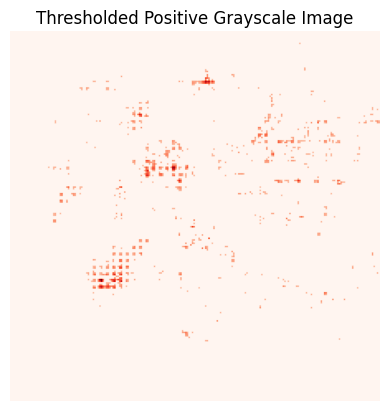

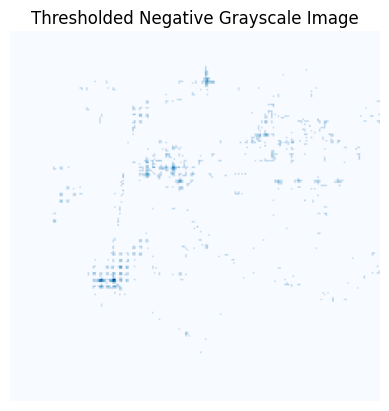

In [86]:
import numpy as np
import shap

# Assuming shap_values_E280_23Y_F is your SHAP values array and background_test_array is your image array
# shap.image_plot(shap_values_E280_23Y_F, background_test_array[[622]])

# Assuming grayscale_image_positive and grayscale_image_negative are your grayscale images
percentile_pos = np.percentile(grayscale_image_positive, 98)
percentile_neg = np.percentile(grayscale_image_negative, 98)

grayscale_pos_thresholded = np.copy(grayscale_image_positive)
grayscale_neg_thresholded = np.copy(grayscale_image_negative)

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_pos] = 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_neg] = 0

# Display thresholded grayscale images using Matplotlib
#pos
plt.imshow(grayscale_pos_thresholded, cmap='Reds')
plt.title('Thresholded Positive Grayscale Image')
plt.axis('off')
plt.show()
#neg
plt.imshow(grayscale_neg_thresholded, cmap='Blues')
plt.title('Thresholded Negative Grayscale Image')
plt.axis('off')
plt.show()


####pos percentile

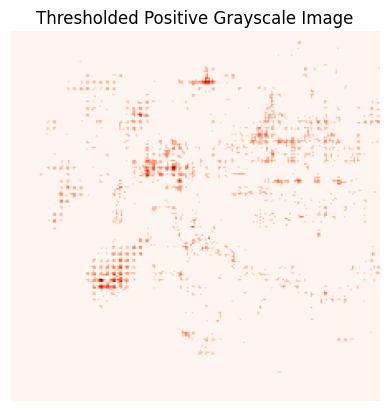

In [108]:
#pos
data= [np.array(shap_values_E280_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
flattened_array_pos = positive.flatten()
normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_positive = normalized_array_pos.reshape(positive.shape)
grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_positive = grayscale_image_positive.squeeze()
# ปรับค่า
percentile_pos = np.percentile(grayscale_image_positive, 95)
grayscale_pos_thresholded = np.copy(grayscale_image_positive)
grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_pos] = 0
# plot show
plt.imshow(grayscale_pos_thresholded, cmap='Reds')
plt.title('Thresholded Positive Grayscale Image')
plt.axis('off')
plt.show()

####neg percentile

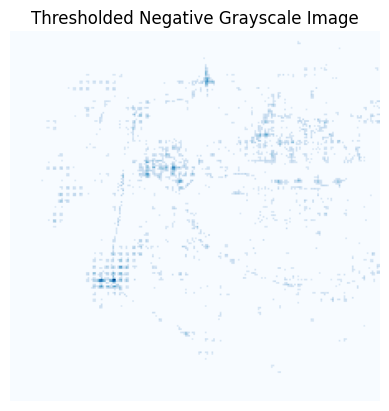

In [113]:
import numpy as np
import shap
#E280_23Y_F
data= [np.array(shap_values_E280_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)
flattened_array_neg = negative_aps.flatten()
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)
grayscale_image_neg = normalized_neg/ 3.0
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)
grayscale_image_negative = grayscale_image_negative.squeeze()
# ปรับค่าpercentile
percentile_neg = np.percentile(grayscale_image_negative, 95)
grayscale_neg_thresholded = np.copy(grayscale_image_negative)
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_neg] = 0

# plot show neg
plt.imshow(grayscale_neg_thresholded, cmap='Blues')
plt.title('Thresholded Negative Grayscale Image')
plt.axis('off')
plt.show()



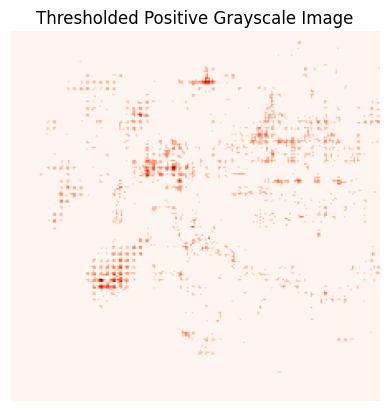

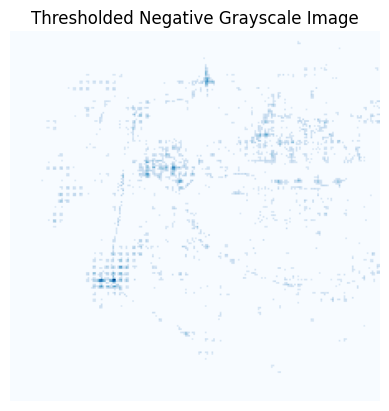

In [88]:
import numpy as np
import shap

#E280_23Y_F
data= [np.array(shap_values_E280_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()
# Assuming shap_values_E280_23Y_F is your SHAP values array and background_test_array is your image array
# shap.image_plot(shap_values_E280_23Y_F, background_test_array[[622]])

# Assuming grayscale_image_positive and grayscale_image_negative are your grayscale images
percentile_pos = np.percentile(grayscale_image_positive, 95)
percentile_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = np.copy(grayscale_image_positive)
grayscale_neg_thresholded = np.copy(grayscale_image_negative)

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_pos] = 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_neg] = 0

# Display thresholded grayscale images using Matplotlib
#pos
plt.imshow(grayscale_pos_thresholded, cmap='Reds')
plt.title('Thresholded Positive Grayscale Image')
plt.axis('off')
plt.show()
#neg
plt.imshow(grayscale_neg_thresholded, cmap='Blues')
plt.title('Thresholded Negative Grayscale Image')
plt.axis('off')
plt.show()


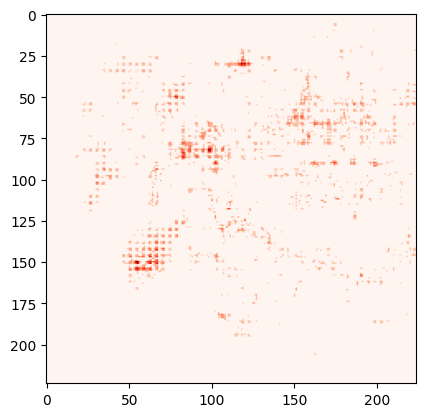

In [98]:
ab = plt.imshow(grayscale_pos_thresholded, cmap='Reds')

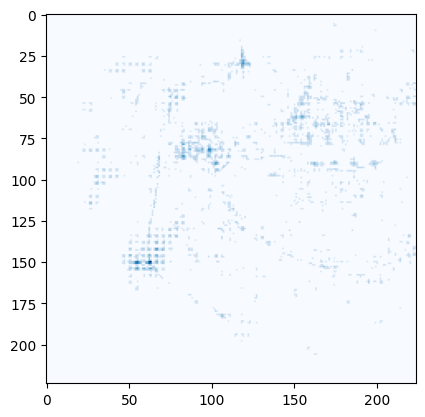

In [97]:
plt.imshow(grayscale_neg_thresholded, cmap='Blues')

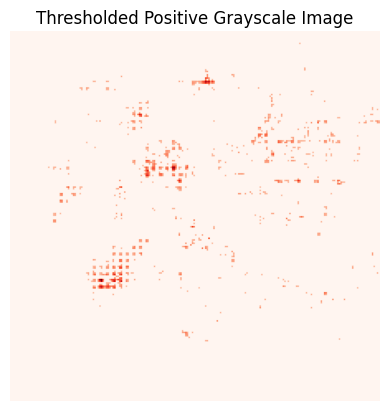

In [81]:
import matplotlib.pyplot as plt

# Display thresholded grayscale images using Matplotlib
plt.imshow(grayscale_pos_thresholded, cmap='Reds')
plt.title('Thresholded Positive Grayscale Image')
plt.axis('off')
plt.show()


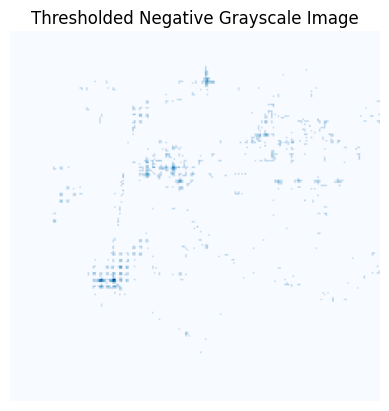

In [82]:
plt.imshow(grayscale_neg_thresholded, cmap='Blues')
plt.title('Thresholded Negative Grayscale Image')
plt.axis('off')
plt.show()

####E244_23Y_F

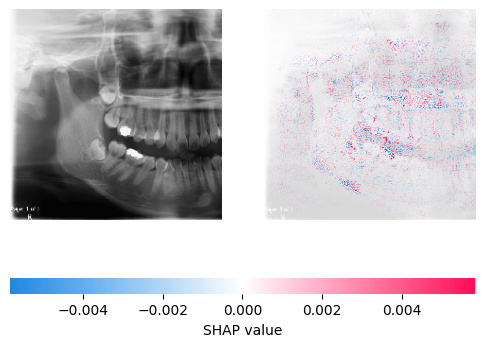

In [99]:
shap_values_E244_23Y_F = explainer_layer2.shap_values(background_test_array[[620]])
%matplotlib inline
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[620]])

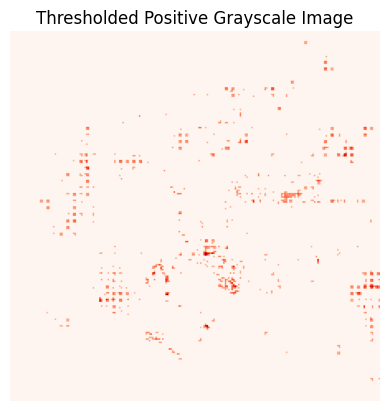

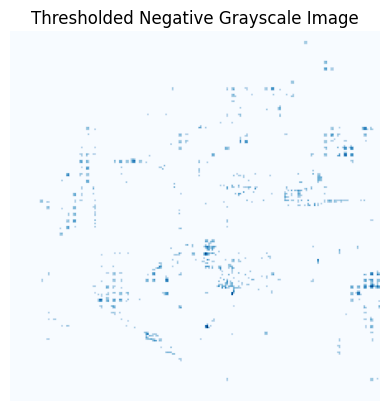

In [104]:
import numpy as np
import shap

#E244_23Y_F
data= [np.array(shap_values_E244_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()
# Assuming shap_values_E280_23Y_F is your SHAP values array and background_test_array is your image array
# shap.image_plot(shap_values_E280_23Y_F, background_test_array[[622]])

# Assuming grayscale_image_positive and grayscale_image_negative are your grayscale images
percentile_pos = np.percentile(grayscale_image_positive, 98)
percentile_neg = np.percentile(grayscale_image_negative, 98)

grayscale_pos_thresholded = np.copy(grayscale_image_positive)
grayscale_neg_thresholded = np.copy(grayscale_image_negative)

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_pos] = 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_neg] = 0

# Display thresholded grayscale images using Matplotlib
#pos
plt.imshow(grayscale_pos_thresholded, cmap='Reds')
plt.title('Thresholded Positive Grayscale Image')
plt.axis('off')
plt.show()
#neg
plt.imshow(grayscale_neg_thresholded, cmap='Blues')
plt.title('Thresholded Negative Grayscale Image')
plt.axis('off')
plt.show()


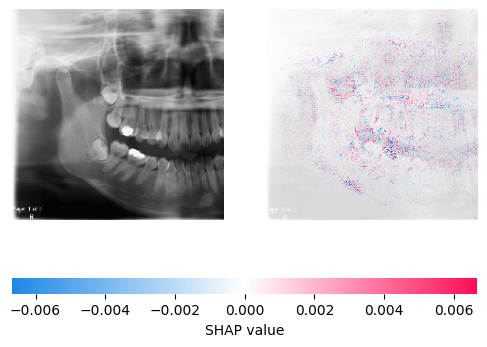

In [48]:
import shap
import matplotlib.pyplot as plt

# Calculate the SHAP values
shap_values_E244_23Y_F = explainer_layer2.shap_values(background_test_array[[620]])

# Use the %matplotlib inline magic to ensure plots are displayed in the notebook
%matplotlib inline

# Plot the image with SHAP values
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[620]])

# Display the plot
plt.show()


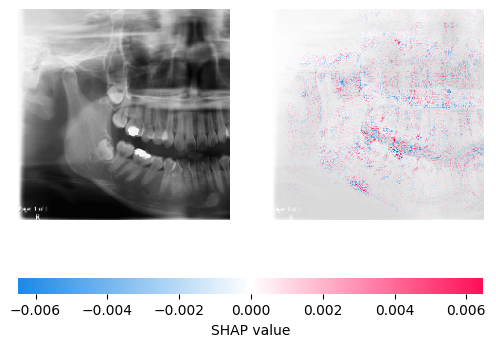

IndexError: list index out of range

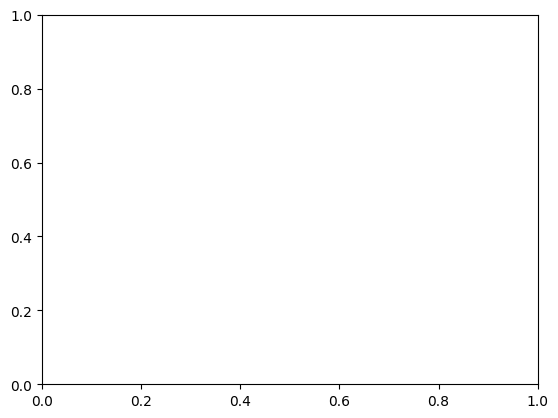

In [49]:
import shap
import matplotlib.pyplot as plt

# Calculate the SHAP values
shap_values_E244_23Y_F = explainer_layer2.shap_values(background_test_array[[620]])

# Plot the image with SHAP values
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[620]])

# Remove the color bar (if it exists)
plt.gca().collections[0].colorbar.remove()

# Display the plot without the color bar
plt.show()


TypeError: Invalid shape (1, 224, 224, 3) for image data

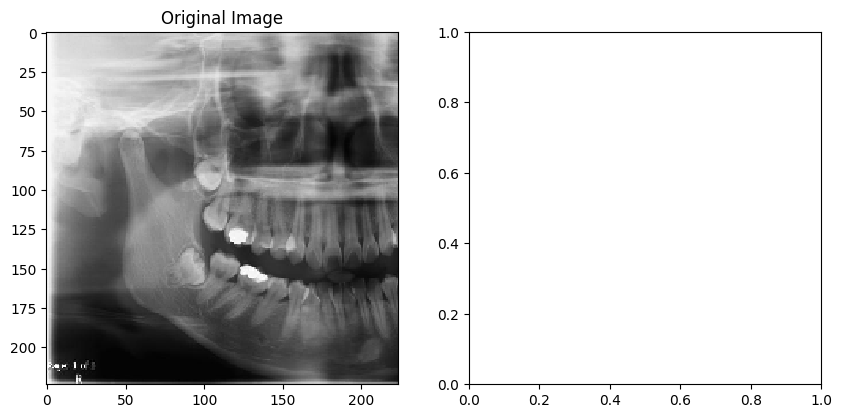

In [50]:
import shap
import matplotlib.pyplot as plt

# Calculate the SHAP values
shap_values_E244_23Y_F = explainer_layer2.shap_values(background_test_array[[620]])

# Extract the SHAP values for the image
shap_values = shap_values_E244_23Y_F[0]

# Plot the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(background_test_array[620], interpolation='nearest')
plt.title("Original Image")

# Plot the SHAP values
plt.subplot(1, 2, 2)
plt.imshow(shap_values, cmap='coolwarm', interpolation='nearest')
plt.title("SHAP Values")

# Remove the color bar
plt.colorbar()  # This line is commented out to avoid adding the color bar

plt.tight_layout()
plt.show()


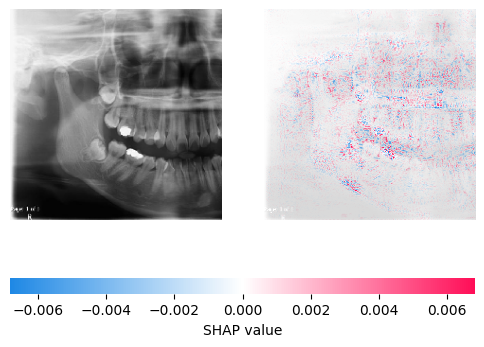

IndexError: list index out of range

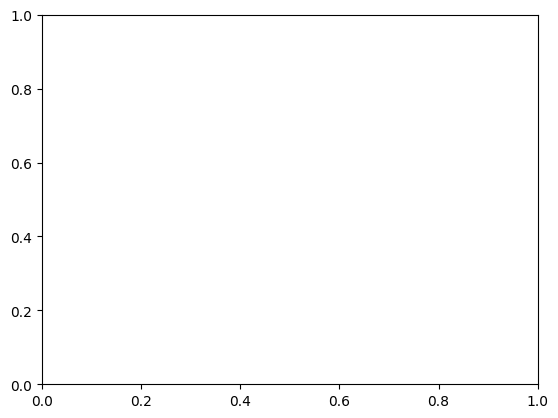

In [46]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the explainer
shap_values_E244_23Y_F = explainer_layer2.shap_values(background_test_array[[620]])

# Use the %matplotlib inline magic to ensure plots are displayed in the notebook
%matplotlib inline

# Plot the image with SHAP values
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[620]])

# Add a color bar for scale
fig = plt.gcf()  # Get the current figure
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='coolwarm'), ax=fig.axes, orientation='vertical')
cbar.set_label('SHAP Value', rotation=270, labelpad=15)
plt.show()


###new code try

In [45]:
#E280_23Y_F
data= [np.array(shap_values_E2_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

NameError: name 'shap_values_E280_23Y_F' is not defined

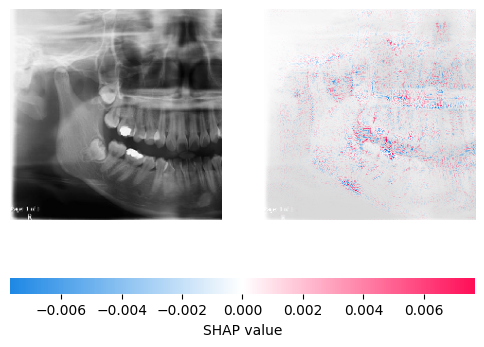

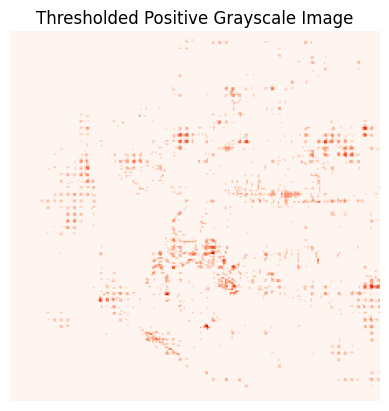

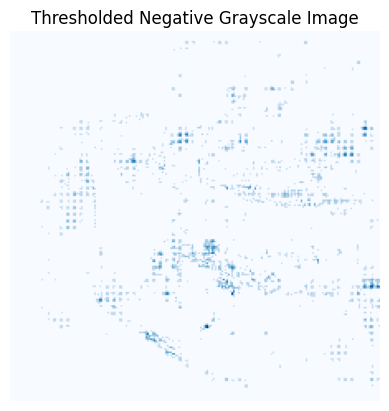

In [38]:
import numpy as np
import shap

# Assuming shap_values_E280_23Y_F is your SHAP values array and background_test_array is your image array
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[620]])

# Assuming grayscale_image_positive and grayscale_image_negative are your grayscale images
percentile_pos = np.percentile(grayscale_image_positive, 95)
percentile_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = np.copy(grayscale_image_positive)
grayscale_neg_thresholded = np.copy(grayscale_image_negative)

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_pos] = 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_neg] = 0

# Display thresholded grayscale images using Matplotlib
plt.imshow(grayscale_pos_thresholded, cmap='Reds')
plt.title('Thresholded Positive Grayscale Image')
plt.axis('off')
plt.show()

plt.imshow(grayscale_neg_thresholded, cmap='Blues')
plt.title('Thresholded Negative Grayscale Image')
plt.axis('off')
plt.show()

In [43]:
#E280_23Y_F
data= [np.array(shap_values_E280_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

NameError: name 'shap_values_E280_23Y_F' is not defined

In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
import numpy as np

def percentile_grayscale(image_path, grayscale_image):

    # Load the original image
    img = Image.open(image_path)
    img_array = np.array(img)

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(img)

    # Overlay the grayscale image with transparency
    ax.imshow(grayscale_image, cmap='Blues', alpha=0.6, extent=[0, image_width, image_height, 0])

    #E244_23Y_F
data= [np.array(shap_values_E244_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

percentile_pos = np.percentile(grayscale_image_positive, 95)  # select grayscale_image with percentile more than 95
percentile_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive.copy()
grayscale_neg_thresholded = grayscale_image_negative.copy()

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_pos] = 0  # set values less than 95th percentile to 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_neg] = 0

In [40]:
#E244_23Y_F
data= [np.array(shap_values_E244_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

percentile_pos = np.percentile(grayscale_image_positive, 95)  # select grayscale_image with percentile more than 95
percentile_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive.copy()
grayscale_neg_thresholded = grayscale_image_negative.copy()

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_pos] = 0  # set values less than 95th percentile to 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_neg] = 0

In [41]:
import numpy as np

# Assuming shap_values_E244_23Y_F is already defined
data = [np.array(shap_values_E244_23Y_F)]  # change list to array
image_array = data[0]  # index in list that stores array

# Separate positive and negative values
positive = np.where(image_array >= 0, image_array, 0)
negative = np.where(image_array < 0, image_array, 0)
negative_aps = np.abs(negative)

# Flatten arrays
flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

# Normalize arrays
normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

# Reshape normalized arrays back to original shape
normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

# Convert to grayscale images
grayscale_image_pos = normalized_positive / 3.0
grayscale_image_neg = normalized_neg / 3.0

# Calculate mean along the 4th axis
grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

# Squeeze to remove single-dimensional entries
grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

# Calculate 95th percentile
percentile_pos = np.percentile(grayscale_image_positive, 95)
percentile_neg = np.percentile(grayscale_image_negative, 95)

# Apply threshold
grayscale_pos_thresholded = grayscale_image_positive.copy()
grayscale_neg_thresholded = grayscale_image_negative.copy()
grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_pos] = 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_neg] = 0

# Print grayscale images (use proper function for displaying arrays, e.g., plt.imshow)
print("Grayscale Image Positive:", grayscale_pos_thresholded)
print("Grayscale Image Negative:", grayscale_neg_thresholded)


Grayscale Image Positive: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Grayscale Image Negative: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


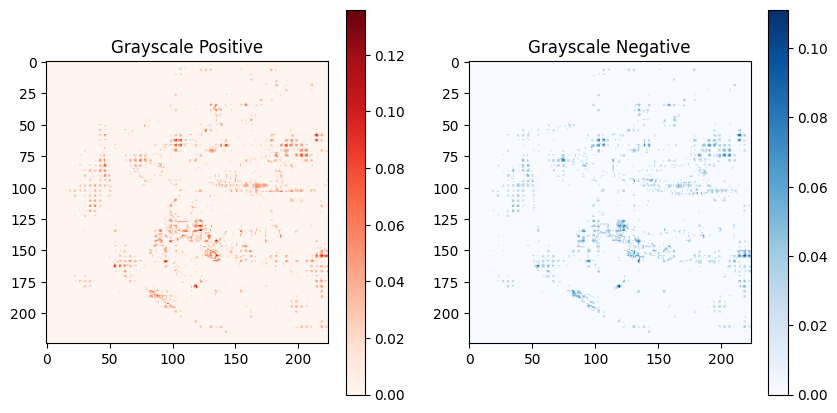

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Grayscale Positive')
plt.imshow(grayscale_pos_thresholded, cmap='Reds')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Grayscale Negative')
plt.imshow(grayscale_neg_thresholded, cmap='Blues')
plt.colorbar()

plt.show()


In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# Assuming shap_values_E244_23Y_F is your SHAP values array and background_test_array is your image array
data = np.array(shap_values_E244_23Y_F)  # change list to array
image_array = data[0]  # index in the list that stores the array

positive = np.where(image_array >= 0, image_array, 0)  # separate positive and negative values, negative values will be filled with 0
negative = np.where(image_array < 0, image_array, 0)
negative_aps = np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

grayscale_image_pos = normalized_positive / 3.0
grayscale_image_neg = normalized_neg / 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=0)  # take the mean along the 0th axis
grayscale_image_negative = np.mean(grayscale_image_neg, axis=0)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

percentile_95_pos = np.percentile(grayscale_image_positive, 95)  # select grayscale_image with percentile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive.copy()
grayscale_neg_thresholded = grayscale_image_negative.copy()

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0  # set values less than 95th percentile to 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

# Print grayscale image negative and positive
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image Positive")
plt.imshow(grayscale_pos_thresholded, cmap='Reds')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Grayscale Image Negative")
plt.imshow(grayscale_neg_thresholded, cmap='Blues')
plt.axis('off')

plt.show()


In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# Assuming shap_values_E244_23Y_F is your SHAP values array and background_test_array is your image array
data = np.array(shap_values_E244_23Y_F)  # change list to array
image_array = data[0]  # index in the list that stores the array

positive = np.where(image_array >= 0, image_array, 0)  # separate positive and negative values, negative values will be filled with 0
negative = np.where(image_array < 0, image_array, 0)
negative_aps = np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

grayscale_image_pos = normalized_positive / 3.0
grayscale_image_neg = normalized_neg / 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=0)  # take the mean along the 0th axis
grayscale_image_negative = np.mean(grayscale_image_neg, axis=0)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

percentile_95_pos = np.percentile(grayscale_image_positive, 90)  # select grayscale_image with percentile more than 90
percentile_95_neg = np.percentile(grayscale_image_negative, 90)

grayscale_pos_thresholded = grayscale_image_positive.copy()
grayscale_neg_thresholded = grayscale_image_negative.copy()

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0  # set values less than 90th percentile to 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

# Enhance contrast by stretching the pixel values
grayscale_pos_thresholded = (grayscale_pos_thresholded - np.min(grayscale_pos_thresholded)) / (np.max(grayscale_pos_thresholded) - np.min(grayscale_pos_thresholded))
grayscale_neg_thresholded = (grayscale_neg_thresholded - np.min(grayscale_neg_thresholded)) / (np.max(grayscale_neg_thresholded) - np.min(grayscale_neg_thresholded))

# Print grayscale image negative and positive
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image Positive")
plt.imshow(grayscale_pos_thresholded, cmap='Reds')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Grayscale Image Negative")
plt.imshow(grayscale_neg_thresholded, cmap='Blues')
plt.axis('off')

plt.show()


In [ ]:

import numpy as np
import shap

# Assuming shap_values_E244_23Y_F is your SHAP values array and background_test_array is your image array
data = np.array(shap_values_E244_23Y_F)  # change list to array
image_array = data[0]  # index in the list that stores the array

positive = np.where(image_array >= 0, image_array, 0)  # separate positive and negative values, negative values will be filled with 0
negative = np.where(image_array < 0, image_array, 0)
negative_aps = np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

grayscale_image_pos = normalized_positive / 3.0
grayscale_image_neg = normalized_neg / 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=0)  # take the mean along the 0th axis
grayscale_image_negative = np.mean(grayscale_image_neg, axis=0)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

percentile_95_pos = np.percentile(grayscale_image_positive, 95)  # select grayscale_image with percentile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive.copy()
grayscale_neg_thresholded = grayscale_image_negative.copy()

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0  # set values less than 95th percentile to 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Grayscale Positive')
plt.imshow(grayscale_pos_thresholded, cmap='Reds')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Grayscale Negative')
plt.imshow(grayscale_neg_thresholded, cmap='Blues')
plt.colorbar()

plt.show()

In [ ]:
# Load the original image
    img = np.array(shap_values_E244_23Y_F)  # change list to array
    img_array = data[0]

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(img)

In [ ]:
ax.imshow(grayscale_pos_thresholded, cmap='Reds', alpha=0.6, extent=[0, image_width, image_height, 0])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import shap

# Assuming shap_values_E244_23Y_F is your SHAP values array and background_test_array is your image array
data = np.array(shap_values_E244_23Y_F)  # change list to array
image_array = data[0]  # index in the list that stores the array

positive = np.where(image_array >= 0, image_array, 0)  # separate positive and negative values, negative values will be filled with 0
negative = np.where(image_array < 0, image_array, 0)
negative_aps = np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

grayscale_image_pos = normalized_positive / 3.0
grayscale_image_neg = normalized_neg / 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=0)  # take the mean along the 0th axis
grayscale_image_negative = np.mean(grayscale_image_neg, axis=0)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

percentile_95_pos = np.percentile(grayscale_image_positive, 95)  # select grayscale_image with percentile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive.copy()
grayscale_neg_thresholded = grayscale_image_negative.copy()

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0  # set values less than 95th percentile to 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

# Normalize the thresholded images for better visualization
grayscale_pos_thresholded = (grayscale_pos_thresholded - np.min(grayscale_pos_thresholded)) / (np.max(grayscale_pos_thresholded) - np.min(grayscale_pos_thresholded))
grayscale_neg_thresholded = (grayscale_neg_thresholded - np.min(grayscale_neg_thresholded)) / (np.max(grayscale_neg_thresholded) - np.min(grayscale_neg_thresholded))

# Convert grayscale to red
red_overlay_pos = np.zeros((*grayscale_pos_thresholded.shape, 4))
red_overlay_neg = np.zeros((*grayscale_neg_thresholded.shape, 4))

red_overlay_pos[..., 0] = 1.0  # Red channel
red_overlay_pos[..., 3] = grayscale_pos_thresholded  # Alpha channel

red_overlay_neg[..., 0] = 1.0  # Red channel
red_overlay_neg[..., 3] = grayscale_neg_thresholded  # Alpha channel

# Get the image dimensions
image_width, image_height = background_test_array[620].shape

# Display images
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title("Positive SHAP values overlay")
plt.imshow(background_test_array[620], cmap='gray', extent=[0, image_width, image_height, 0])
plt.imshow(red_overlay_pos, cmap='Reds', alpha=0.6, extent=[0, image_width, image_height, 0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Negative SHAP values overlay")
plt.imshow(background_test_array[620], cmap='gray', extent=[0, image_width, image_height, 0])
plt.imshow(red_overlay_neg, cmap='Reds', alpha=0.6, extent=[0, image_width, image_height, 0])
plt.axis('off')

plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import shap

# Assuming shap_values_E244_23Y_F is your SHAP values array and background_test_array is your image array
data = np.array(shap_values_E244_23Y_F)  # change list to array
image_array = data[0]  # index in the list that stores the array

positive = np.where(image_array >= 0, image_array, 0)  # separate positive and negative values, negative values will be filled with 0
negative = np.where(image_array < 0, image_array, 0)
negative_aps = np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

grayscale_image_pos = normalized_positive / 3.0
grayscale_image_neg = normalized_neg / 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=0)  # take the mean along the 0th axis
grayscale_image_negative = np.mean(grayscale_image_neg, axis=0)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

percentile_95_pos = np.percentile(grayscale_image_positive, 95)  # select grayscale_image with percentile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive.copy()
grayscale_neg_thresholded = grayscale_image_negative.copy()

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0  # set values less than 95th percentile to 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

# Normalize the thresholded images for better visualization
grayscale_pos_thresholded = (grayscale_pos_thresholded - np.min(grayscale_pos_thresholded)) / (np.max(grayscale_pos_thresholded) - np.min(grayscale_pos_thresholded))
grayscale_neg_thresholded = (grayscale_neg_thresholded - np.min(grayscale_neg_thresholded)) / (np.max(grayscale_neg_thresholded) - np.min(grayscale_neg_thresholded))

# Convert grayscale to red
red_overlay_pos = np.zeros((*grayscale_pos_thresholded.shape, 4))
red_overlay_neg = np.zeros((*grayscale_neg_thresholded.shape, 4))

red_overlay_pos[..., 0] = 1.0  # Red channel
red_overlay_pos[..., 3] = grayscale_pos_thresholded  # Alpha channel

red_overlay_neg[..., 0] = 1.0  # Red channel
red_overlay_neg[..., 3] = grayscale_neg_thresholded  # Alpha channel

# Get the image dimensions
image_shape = background_test_array[620].shape

# Display images
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title("Positive SHAP values overlay")
plt.imshow(background_test_array[620], cmap='gray', extent=[0, image_shape[1], image_shape[0], 0])
plt.imshow(red_overlay_pos, cmap='Reds', alpha=0.6, extent=[0, image_shape[1], image_shape[0], 0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Negative SHAP values overlay")
plt.imshow(background_test_array[620], cmap='gray', extent=[0, image_shape[1], image_shape[0], 0])
plt.imshow(red_overlay_neg, cmap='Reds', alpha=0.6, extent=[0, image_shape[1], image_shape[0], 0])
plt.axis('off')

plt.show()


In [ ]:
shap.image_plot(np.array([grayscale_neg_thresholded]), background_test_array[[620]])  # create greyscale image

In [ ]:
import numpy as np
import shap

# Assuming shap_values_E244_23Y_F is your SHAP values array and background_test_array is your image array
data = np.array(shap_values_E244_23Y_F)  # change list to array
image_array = data[0]  # index in the list that stores the array

positive = np.where(image_array >= 0, image_array, 0)  # separate positive and negative values, negative values will be filled with 0
negative = np.where(image_array < 0, image_array, 0)
negative_aps = np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

grayscale_image_pos = normalized_positive / 3.0
grayscale_image_neg = normalized_neg / 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=0)  # take the mean along the 0th axis
grayscale_image_negative = np.mean(grayscale_image_neg, axis=0)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

percentile_95_pos = np.percentile(grayscale_image_positive, 99)  # select grayscale_image with percentile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 99)

grayscale_pos_thresholded = grayscale_image_positive.copy()
grayscale_neg_thresholded = grayscale_image_negative.copy()

grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0  # set values less than 95th percentile to 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

shap.image_plot(np.array([grayscale_pos_thresholded]), background_test_array[[620]])  # create greyscale image

In [ ]:

shap.image_plot(np.array([grayscale_neg_thresholded]), background_test_array[[620]])  # create greyscale image

In [ ]:
from PIL import Image
Image_E244_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg')
Image_E244_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg'

Image_E280_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg')
Image_E280_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg'

Image_FlipE283_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE283.jpg')
Image_FlipE283_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE283.jpg'

Image_FlipE109_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE109.jpg')
Image_FlipE109_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE109.jpg'

Image_FlipE150_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE150.jpg')
Image_FlipE150_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE150.jpg'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image

# Assuming you have loaded the image and processed the SHAP values as in your code

def overlay_images(image_path, grayscale_image):
    # Load the original image
    img = Image.open(image_path)
    img_array = np.array(img)

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(img)

    # Overlay the positive and negative grayscale images with transparency
    ax.imshow(grayscale_image[0], cmap='Reds', alpha=0.6, extent=[0, image_width, image_height, 0])
    ax.imshow(grayscale_image[1], cmap='Blues', alpha=0.6, extent=[0, image_width, image_height, 0])

    # Optionally, you can add legends or other annotations

    # Show the plot
    plt.show()

# Call the function with the image path and processed SHAP values
overlay_images(Image_E244_23Y_F_path,[grayscale_image_positive, grayscale_image_negative])
